# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

This is a very pivotal step in the process of analyzing data. This involves understanding the problem and making some hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis which we can potentially perform if data is available.

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

Some of my Hypotheses:

1. Items with a lower fat content may not be popular and may have lower sales.
2. Items with a high visibility will be seen by more customers which could lead to higher sales.
3. Items with a lower mrp might be more attractive to customers which could lead to higher sales.

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np

#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')

In [2]:
data.shape

(8523, 12)

In [3]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
data.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

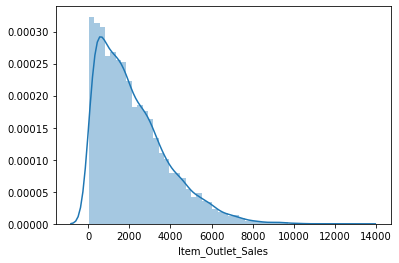

In [8]:
sns.distplot(data['Item_Outlet_Sales'])

**Task:** One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Task:**: Look at some basic descriptive statistics for numerical variables.

Make some observations: <br>
Do min, max values make sense?

In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
# Number of items with zero visibility.
len(data[(data["Item_Visibility"] == 0)])

526

In [12]:
data[(data["Item_Visibility"] == 0)].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064


First, we will begin with univariate analysis.

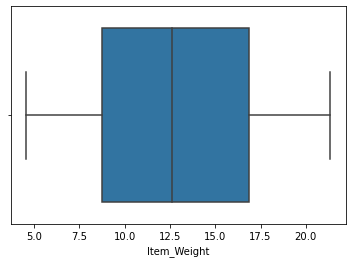

In [13]:
sns.boxplot(x=data['Item_Weight'])

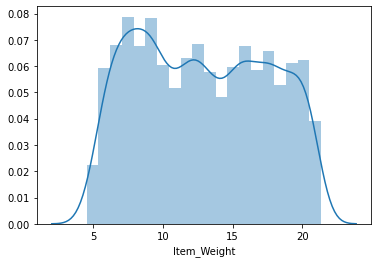

In [14]:
sns.distplot(data['Item_Weight'])

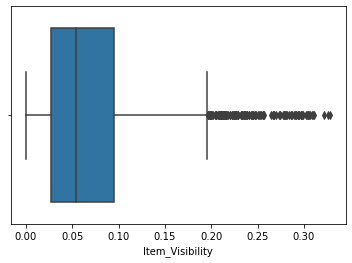

In [15]:
sns.boxplot(x=data['Item_Visibility'])

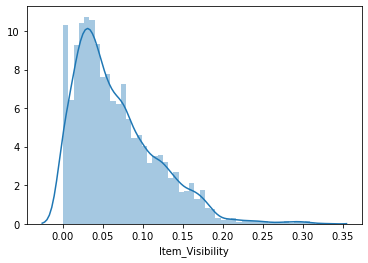

In [16]:
sns.distplot(data['Item_Visibility'])

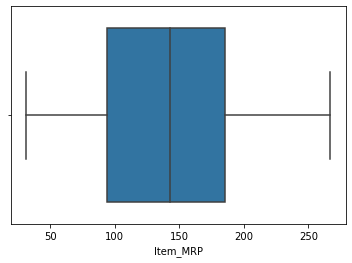

In [17]:
sns.boxplot(x=data['Item_MRP'])

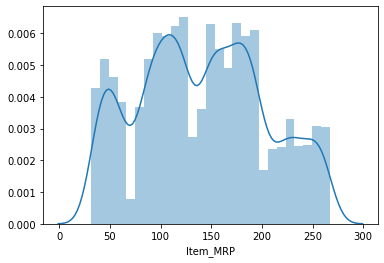

In [18]:
sns.distplot(data['Item_MRP'])

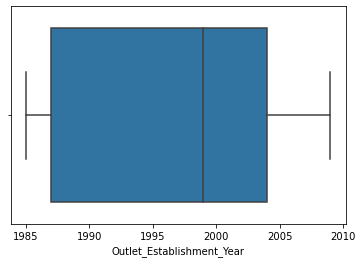

In [19]:
sns.boxplot(x=data['Outlet_Establishment_Year'])

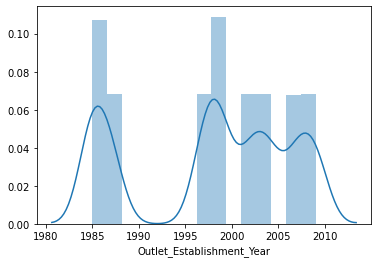

In [20]:
sns.distplot(data['Outlet_Establishment_Year'])

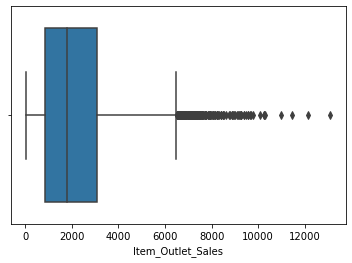

In [21]:
sns.boxplot(x=data['Item_Outlet_Sales'])

Now, we will continue with multivariate analysis.

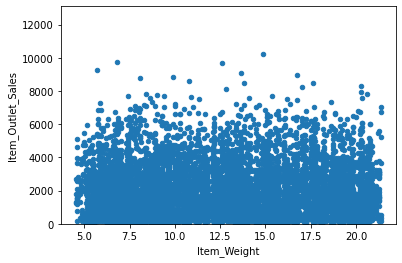

In [22]:
#scatter plot Item_Weight vs. Item_Outlet_Sales
var = 'Item_Weight'
data_iw = data[['Item_Outlet_Sales',var]]
data_iw.plot.scatter(x=var, y='Item_Outlet_Sales', ylim=(0,13100))

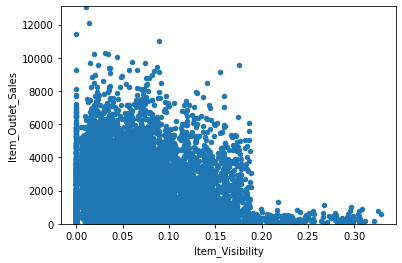

In [23]:
#scatter plot Item_Visibility vs. Item_Outlet_Sales
var = 'Item_Visibility'
data_iv = data[['Item_Outlet_Sales',var]]
data_iv.plot.scatter(x=var, y='Item_Outlet_Sales', ylim=(0,13100))

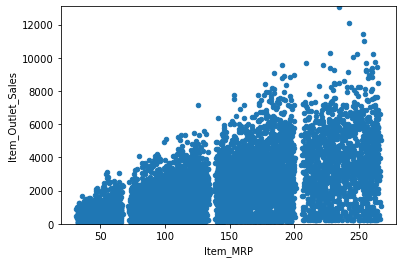

In [24]:
#scatter plot Item_MRP vs. Item_Outlet_Sales
var = 'Item_MRP'
data_im = data[['Item_Outlet_Sales',var]]
data_im.plot.scatter(x=var, y='Item_Outlet_Sales', ylim=(0,13100))

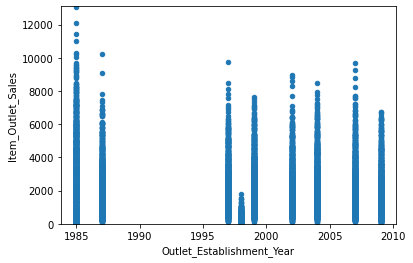

In [25]:
#scatter plot Outlet_Establishment_Year vs. Item_Outlet_Sales
var = 'Outlet_Establishment_Year'
data_oey = data[['Item_Outlet_Sales',var]]
data_oey.plot.scatter(x=var, y='Item_Outlet_Sales', ylim=(0,13100))

(-0.5, 8.5, 0.0, 13500.0)

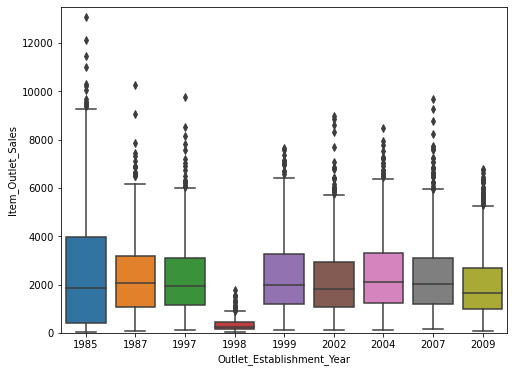

In [26]:
# Outlet_Establishment_Year
var = 'Outlet_Establishment_Year'
data_oey = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_oey)
fig.axis(ymin=0, ymax=13500)

In [27]:
data['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [28]:
data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [29]:
data['Item_MRP'].value_counts()

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

In [30]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [31]:
data['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

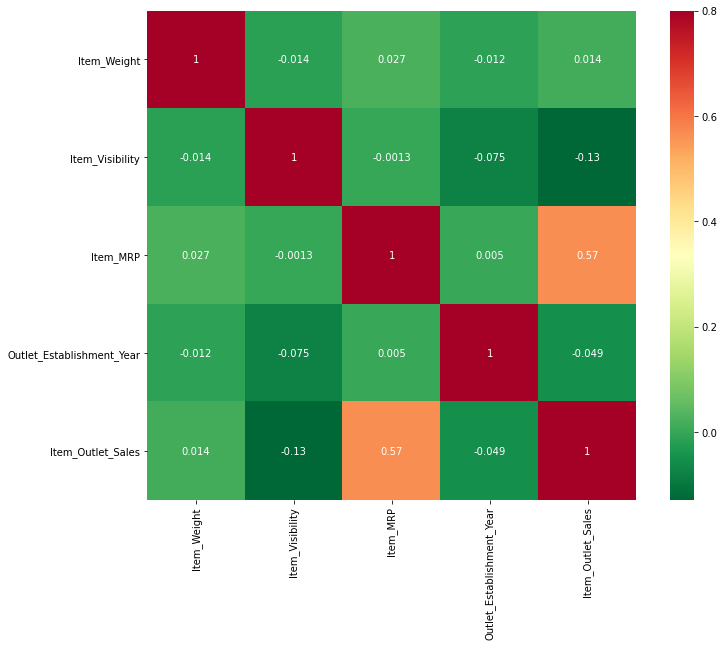

In [32]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True,cmap="RdYlGn_r")

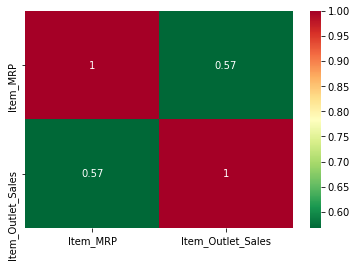

In [33]:
# most correlated features with Item_Outlet_Sales
top_corr_features = corrmat.index[abs(corrmat["Item_Outlet_Sales"])>0.5]
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

**Task:** Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [34]:
cat_feats = data.dtypes[data.dtypes == 'object'].index.tolist()
cat_feats

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [35]:
data[cat_feats].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

**Task:** How many products are there, how many stores, item types?

**Task:** Explore the numbers of each categorical variable

In [36]:
data[cat_feats].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [37]:
data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
DRN47     9
NCL31     9
FDG09     9
         ..
FDK57     1
DRF48     1
FDE52     1
FDT35     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [38]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [39]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [40]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [41]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [42]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [43]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Now, we will continue with multivariate analysis for the categorical features.

(-0.5, 4.5, 0.0, 13500.0)

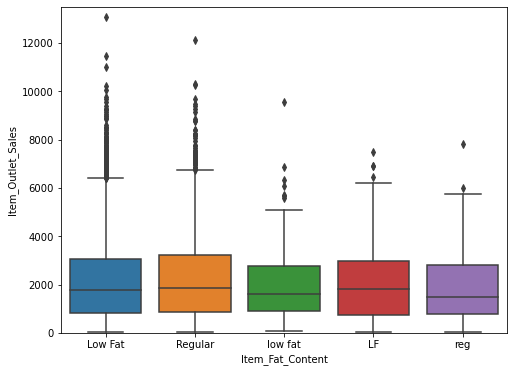

In [44]:
# Item_Fat_Content
var = 'Item_Fat_Content'
data_ifc = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_ifc)
fig.axis(ymin=0, ymax=13500)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

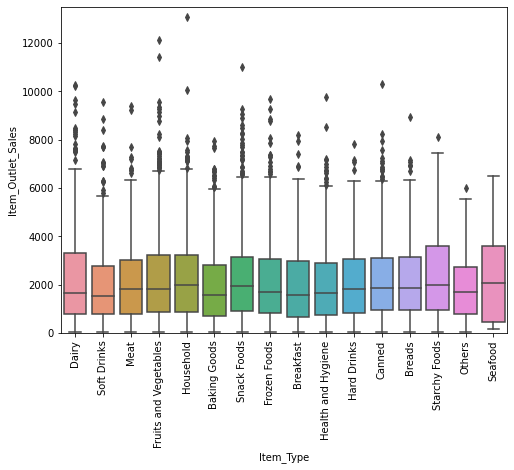

In [45]:
# Item_Type
var = 'Item_Type'
data_it = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_it)
fig.axis(ymin=0, ymax=13500)
plt.xticks(rotation=90)

(-0.5, 9.5, 0.0, 13500.0)

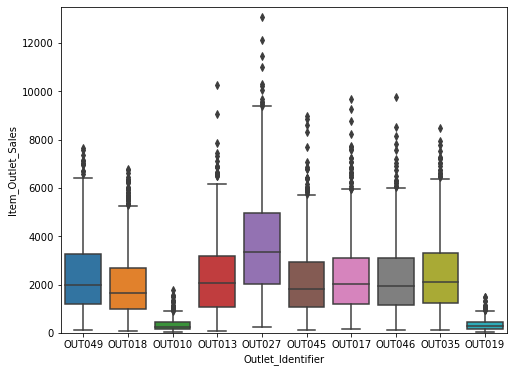

In [46]:
# Outlet_Identifier
var = 'Outlet_Identifier'
data_oi = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_oi)
fig.axis(ymin=0, ymax=13500)

(-0.5, 2.5, 0.0, 13500.0)

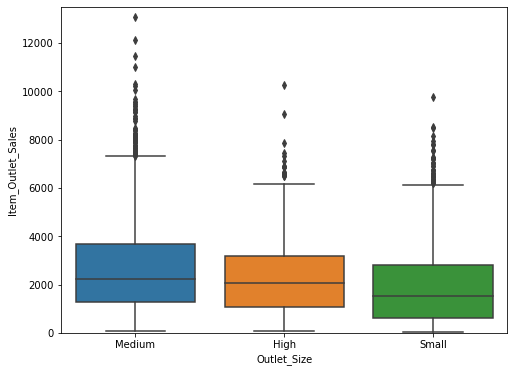

In [47]:
# Outlet_Size
var = 'Outlet_Size'
data_os = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_os)
fig.axis(ymin=0, ymax=13500)

(-0.5, 2.5, 0.0, 13500.0)

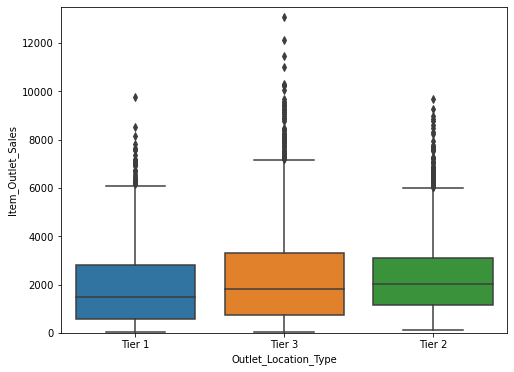

In [48]:
# Outlet_Location_Type
var = 'Outlet_Location_Type'
data_olt = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_olt)
fig.axis(ymin=0, ymax=13500)

(-0.5, 3.5, 0.0, 13500.0)

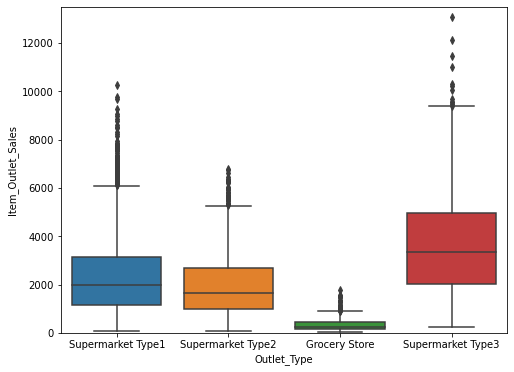

In [49]:
# Outlet_Type
var = 'Outlet_Type'
data_ot = data[['Item_Outlet_Sales',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Item_Outlet_Sales", data=data_ot)
fig.axis(ymin=0, ymax=13500)

Observe the output:

Tip: look at the unique values of `Item_Fat_Content`

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

**Task:** Which variables have missing values? How can you fill those values? Think of some suitalbe strategy (zero filling, mean, median values. Maybe mean values per `Item_Type`?)

In [50]:
data.isnull().sum()[(data.isnull().sum()) > 0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

First, we will work with the only numeric variable with missing values, Item_Weight.

In [51]:
# create new variable with the information that it was missing

data["Item_Weight" + "_missing_ind"] = 0
data.loc[data["Item_Weight"].isnull(), "Item_Weight" + "_missing_ind"] = 1

In [52]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,0
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,0
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,0


First, we will find the Item Identifiers of the products whose weight is missing and then check the dataframe to see if the weight is listed elsewhere for products with the same Item Identifier.

In [53]:
data_null_weight = (data[(data["Item_Weight_missing_ind"]) > 0])
data_null_weight.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,1
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,1
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,1
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,1
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916,1
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614,1
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950,1
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,1
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720,1


In [54]:
len(data_null_weight)

1463

In [55]:
items_null_weight = (list(data_null_weight["Item_Identifier"].unique()))

In [56]:
len(items_null_weight)

1142

In [57]:
data[data["Item_Identifier"].isin(items_null_weight)][["Item_Identifier", "Item_Weight"]]

,Item_Identifier,Item_Weight
0,FDA15,9.30
1,DRC01,5.92
2,FDN15,17.50
3,FDX07,19.20
6,FDO10,13.65
...,...,...
8513,FDH31,12.00
8514,FDA01,15.00
8516,NCJ19,18.60
8520,NCJ29,10.60


In [58]:
data[(data["Item_Identifier"] == "FDA15")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,0
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,0
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,0
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,0
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392,0
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392,1
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208,0


In [59]:
# Creating a new dataframe from data where "Item_Identifier" belongs to items_null_weight.

data_items_nw = (data[data["Item_Identifier"].isin(items_null_weight)][["Item_Identifier", "Item_Weight"]])
len(data_items_nw)

6612

In [60]:
data_items_nw["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCI54     9
FDG09     9
NCF42     9
         ..
NCS41     2
FDK57     1
FDE52     1
FDN52     1
FDQ60     1
Name: Item_Identifier, Length: 1142, dtype: int64

In [61]:
# Remove any rows where Item_Weight is null.

data_items_nw.dropna(inplace=True)
len(data_items_nw)

5149

In [62]:
# Make sure the original dataframe, data, is unchanged.

len(data)

8523

In [63]:
# Check to see that no two products with the same Item_Identifier have different weights.

a = (data_items_nw.groupby(["Item_Identifier", "Item_Weight"]).size().index.get_level_values(0))
len(set(a)) == len(a)

True

In [64]:
# Remove duplicate rows from data_items_nw.

data_items_nw.drop_duplicates(inplace=True)
len(data_items_nw)

1138

In [65]:
# Create a new list containing the Item Identifiers from data_items_nw.

items_null_weight2 = (list(data_items_nw["Item_Identifier"].unique()))

In [66]:
(data_items_nw["Item_Weight"][(data_items_nw["Item_Identifier"] == "FDA15")]).array[0]

9.3

In [67]:
mask = (data["Item_Identifier"] == "FDA15")
mask2 = (data_items_nw["Item_Identifier"] == "FDA15")
data.loc[mask, "Item_Weight"] = (data_items_nw.loc[mask2, "Item_Weight"].array[0])

In [68]:
data["Item_Weight"][(data["Item_Identifier"] == "FDA15")] 

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    9.3
7543    9.3
Name: Item_Weight, dtype: float64

In [69]:
len(data)

8523

In [70]:
data.isnull().sum()[(data.isnull().sum()) > 0]

Item_Weight    1462
Outlet_Size    2410
dtype: int64

In [71]:
mask = (data["Item_Identifier"] == "FDW13")
data.loc[mask, "Item_Weight"]

256     8.5
1141    8.5
2190    8.5
3928    NaN
3978    8.5
6499    8.5
6587    8.5
7029    8.5
8025    NaN
8032    8.5
Name: Item_Weight, dtype: float64

In [72]:
mask2 = (data_items_nw["Item_Identifier"] == "FDW13")
data.loc[mask, "Item_Weight"] = (data_items_nw.loc[mask2, "Item_Weight"].array[0])
data.loc[mask, "Item_Weight"]

256     8.5
1141    8.5
2190    8.5
3928    8.5
3978    8.5
6499    8.5
6587    8.5
7029    8.5
8025    8.5
8032    8.5
Name: Item_Weight, dtype: float64

In [73]:
# We will use the item weights from data_items_nw to fill in data.

for item in items_null_weight2:
    mask = (data["Item_Identifier"] == item)
    mask2 = (data_items_nw["Item_Identifier"] == item)
    data.loc[mask, "Item_Weight"] = (data_items_nw.loc[mask2, "Item_Weight"].array[0])

In [74]:
data.isnull().sum()[(data.isnull().sum()) > 0]

Item_Weight       4
Outlet_Size    2410
dtype: int64

In [75]:
data[data["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,1
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,1
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,1
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,1


In [76]:
data.groupby('Item_Type')["Item_Weight"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,647.0,12.285317,4.749789,4.880,8.235,11.6500,15.7000,20.85
Breads,251.0,11.297689,4.479814,4.635,7.050,10.6000,15.0000,20.85
Breakfast,110.0,12.779727,4.979703,6.425,8.060,10.6950,17.2500,21.10
Canned,649.0,12.403320,4.636247,4.615,8.355,12.3500,16.5000,21.35
Dairy,681.0,13.379905,4.699321,4.805,9.270,13.3500,17.6000,20.70
Frozen Foods,855.0,12.782404,4.480479,4.555,8.905,12.8500,16.7000,20.85
Fruits and Vegetables,1232.0,13.236713,4.580452,5.460,8.985,13.1000,17.1000,21.35
Hard Drinks,214.0,11.456238,4.290768,4.610,8.260,9.8975,15.0000,19.70
Health and Hygiene,520.0,13.052327,4.475660,5.175,9.695,12.1500,17.6000,21.25


In [77]:
median_weights_by_Item_Type = data.groupby('Item_Type')["Item_Weight"].median()
median_weights_by_Item_Type

Item_Type
Baking Goods             11.6500
Breads                   10.6000
Breakfast                10.6950
Canned                   12.3500
Dairy                    13.3500
Frozen Foods             12.8500
Fruits and Vegetables    13.1000
Hard Drinks               9.8975
Health and Hygiene       12.1500
Household                13.5000
Meat                     12.3500
Others                   14.5000
Seafood                  11.6500
Snack Foods              13.1500
Soft Drinks              11.8000
Starchy Foods            13.5000
Name: Item_Weight, dtype: float64

In [78]:
median_weights_by_Item_Type['Frozen Foods']

12.85

In [79]:
data.loc[927, "Item_Weight"]

nan

In [80]:
# Now, we will fill in the remaining item weights by using the median per Item_Type.

data.loc[927, "Item_Weight"] = median_weights_by_Item_Type['Frozen Foods']
data.loc[1922, "Item_Weight"] = median_weights_by_Item_Type['Snack Foods']
data.loc[4187, "Item_Weight"] = median_weights_by_Item_Type['Dairy']
data.loc[5022, "Item_Weight"] = median_weights_by_Item_Type['Baking Goods']


In [81]:
data.isnull().sum()[(data.isnull().sum()) > 0]

Outlet_Size    2410
dtype: int64

In [82]:
# Now we will check how the means and medians of Item_Weight have changed.

data["Item_Weight"].describe()

count    8523.000000
mean       12.875361
std         4.645031
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [83]:
data.groupby('Item_Type')["Item_Weight"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,12.284336,4.746183,4.880,8.235,11.6500,15.7000,20.85
Breads,251.0,11.297689,4.479814,4.635,7.050,10.6000,15.0000,20.85
Breakfast,110.0,12.779727,4.979703,6.425,8.060,10.6950,17.2500,21.10
Canned,649.0,12.403320,4.636247,4.615,8.355,12.3500,16.5000,21.35
Dairy,682.0,13.379861,4.695869,4.805,9.270,13.3500,17.6000,20.70
Frozen Foods,856.0,12.782482,4.477859,4.555,8.905,12.8500,16.7000,20.85
Fruits and Vegetables,1232.0,13.236713,4.580452,5.460,8.985,13.1000,17.1000,21.35
Hard Drinks,214.0,11.456238,4.290768,4.610,8.260,9.8975,15.0000,19.70
Health and Hygiene,520.0,13.052327,4.475660,5.175,9.695,12.1500,17.6000,21.25


Now, we will work with the only categorical variable with missing values, Outlet_Size.

In [84]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [85]:
data.groupby(["Outlet_Identifier", "Outlet_Size"]).size()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
dtype: int64

In [86]:
data[(data["Outlet_Identifier"].isin(["OUT045", "OUT017", "OUT010"]))].count()

Item_Identifier              2410
Item_Weight                  2410
Item_Fat_Content             2410
Item_Visibility              2410
Item_Type                    2410
Item_MRP                     2410
Outlet_Identifier            2410
Outlet_Establishment_Year    2410
Outlet_Size                     0
Outlet_Location_Type         2410
Outlet_Type                  2410
Item_Outlet_Sales            2410
Item_Weight_missing_ind      2410
dtype: int64

The Outlet Size is missing if and only if the store has the Outlet Identifiers, OUT045, OUT017, or OUT010.

In [87]:
data.groupby(["Outlet_Location_Type", "Outlet_Size"]).size()

Outlet_Location_Type  Outlet_Size
Tier 1                Medium          930
                      Small          1458
Tier 2                Small           930
Tier 3                High            932
                      Medium         1863
dtype: int64

In [88]:
data.groupby(["Outlet_Location_Type", "Outlet_Identifier"]).size()

Outlet_Location_Type  Outlet_Identifier
Tier 1                OUT019               528
                      OUT046               930
                      OUT049               930
Tier 2                OUT017               926
                      OUT035               930
                      OUT045               929
Tier 3                OUT010               555
                      OUT013               932
                      OUT018               928
                      OUT027               935
dtype: int64

In [89]:
data.groupby(["Outlet_Type", "Outlet_Size"]).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [90]:
data.groupby(["Outlet_Type", "Outlet_Identifier"]).size()

Outlet_Type        Outlet_Identifier
Grocery Store      OUT010               555
                   OUT019               528
Supermarket Type1  OUT013               932
                   OUT017               926
                   OUT035               930
                   OUT045               929
                   OUT046               930
                   OUT049               930
Supermarket Type2  OUT018               928
Supermarket Type3  OUT027               935
dtype: int64

In [91]:
# Since we do not have enough information to fill in the missing values for 
# Outlet_Size, we will create a new category for the missing value.

data["Outlet_Size"].fillna('Unknown', inplace=True)

**Task:** Check if there are no more missing values

In [92]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_missing_ind      0
dtype: int64